In [1]:
#Image classification using CNN:-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
import os

In [3]:
train_dir = r"D:\Dataset files_ML\Covid19-dataset\train"
test_dir = r"D:\Dataset files_ML\Covid19-dataset\test"

In [4]:
train_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)

In [5]:
test_generator = ImageDataGenerator(rescale=1.0/255)

In [6]:
width, heigth = 512, 512
batch_size = 32

In [7]:
#To found the 251 images and 3 classes in training data:-
x_train = train_generator.flow_from_directory(
    train_dir,
    target_size=(width, heigth),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.


In [8]:
#To found 66 images and 3 classes in test data:-
x_test = test_generator.flow_from_directory(
    test_dir,
    target_size=(width, heigth),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 66 images belonging to 3 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(width, heigth, 3)),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPool2D((2,2)),
    Conv2D(128, (3,3), activation="relu"),
    MaxPool2D((3,3)),
    Conv2D(128, (3,3), activation="relu"),
    MaxPool2D((3,3)),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(3, activation="softmax")
])

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
history = model.fit(x_train, epochs=30, batch_size=batch_size, validation_data=x_test)

Epoch 1/30


8/8 [==============================] - 266s 31s/step - loss: 1.1217 - accuracy: 0.4940 - val_loss: 1.1092 - val_accuracy: 0.3939
Epoch 2/30
8/8 [==============================] - 220s 26s/step - loss: 0.9048 - accuracy: 0.5777 - val_loss: 0.9296 - val_accuracy: 0.7121
Epoch 3/30
8/8 [==============================] - 190s 24s/step - loss: 0.6741 - accuracy: 0.7131 - val_loss: 0.9463 - val_accuracy: 0.6667
Epoch 4/30
8/8 [==============================] - 152s 20s/step - loss: 0.5804 - accuracy: 0.7729 - val_loss: 0.7462 - val_accuracy: 0.7424
Epoch 5/30
8/8 [==============================] - 176s 21s/step - loss: 0.5593 - accuracy: 0.7371 - val_loss: 0.6758 - val_accuracy: 0.6970
Epoch 6/30
8/8 [==============================] - 187s 24s/step - loss: 0.5551 - accuracy: 0.7649 - val_loss: 0.7559 - val_accuracy: 0.7121
Epoch 7/30
8/8 [==============================] - 204s 25s/step - loss: 0.5512 - accuracy: 0.7729 - val_loss: 0.8016 - val_accuracy: 0.6667
Epoch 8/30
8/8 [==

In [1]:
#To plot the graph and see the Training and validation accuracy using Graph:-

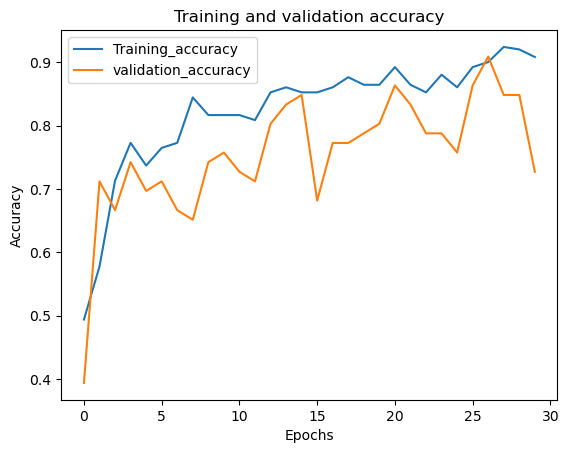

In [13]:
plt.plot(history.history["accuracy"], label="Training_accuracy")
plt.plot(history.history["val_accuracy"], label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()

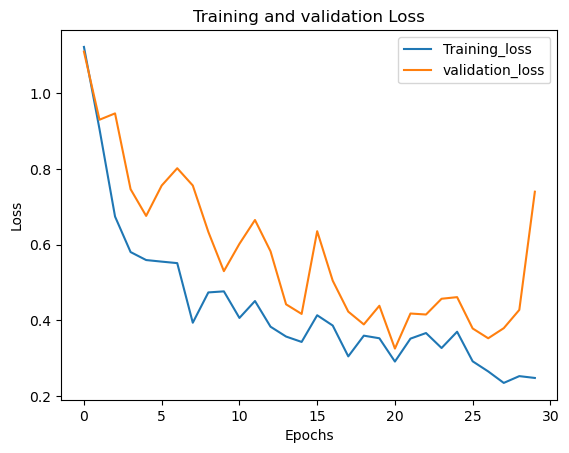

In [15]:
#To show the Training and validation loss:-
plt.plot(history.history["loss"], label="Training_loss")
plt.plot(history.history["val_loss"], label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation Loss")
plt.legend()

In [35]:
class_names = x_test.class_indices
classes = {value:key for key, value in class_names.items()}
print("Class Names:-", classes)

Class Names:- {0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [36]:
from tensorflow.keras.preprocessing import image

In [58]:
Image = image.load_img("0100.jpeg", target_size=(width, heigth))

In [59]:
Image_arr = image.img_to_array(Image)

In [60]:
Image_arr = np.expand_dims(Image_arr, axis=0)

In [61]:
Image_arr = Image_arr / 255

In [62]:
predict = model.predict(Image_arr)

1/1 [==============================] - 0s 131ms/step


In [63]:
np.argmax(predict)

0

In [64]:
#To find image of the class:
print("The given Image is of class:-", classes[np.argmax(predict)])

The given Image is of class:- Covid


# In Summary:-

The Convolutional Neural Network (CNN) models in both graphs show good potential for classification, achieving high accuracy/low loss and also validation accuracy. 

While minimizing overfitting. Validation metrics suggest the models can generalize well to unseen data. However, further evaluation on a larger dataset is recommended for confirmation.
Using graph it can show the Training, validation accuracy and Training, validation Loss.

And Finally, :- Trained CNN model demonstrates promising performance on [dataset], achieving [accuracy/loss] of [value] on validation data with limited overfitting potential. 
Further evaluation on a larger dataset is recommended.